In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [51]:
path='tests/'
filename='noisy_projections.top'

In [52]:
energy_contr=[]
energies=[]
deviations=[]
for subdir, dirs, files in sorted(os.walk(path)):
    for file in files:
        if file==filename:
            f=os.path.join(subdir, file)
            print('reading '+f)
            with open(f,'r') as inp:
                for line in inp:
                    splitline=line.strip().split('\t')
                    if line.startswith('#ENERGY_CONTRIBUTION'):
                        ec=int(splitline[1])/100
                        energy_contr.append(ec)
                        continue                        
                    if line.startswith('#ENERGY'):       
                        en=float(splitline[1])
                        energies.append(en)
                        print(str(ec)+'\t'+str(en))
                        
                    if line.startswith('#DEVIATION'):     
                        dev=float(splitline[1])
                        deviations.append(dev)
                        continue
                        

reading tests/noisy_projections.top
0.0	-6.748923805466395
reading tests/001/noisy_projections.top
0.01	-6.781474138028996
reading tests/002/noisy_projections.top
0.02	-6.808105347206397
reading tests/003/noisy_projections.top
0.03	-6.829536675837365
reading tests/005/noisy_projections.top
0.05	-6.864806585934311
reading tests/010/noisy_projections.top
0.1	-6.944839725847233
reading tests/015/noisy_projections.top
0.15	-6.990990065488892
reading tests/020/noisy_projections.top
0.2	-7.019507527487748
reading tests/030/noisy_projections.top
0.3	-7.059596052563122
reading tests/040/noisy_projections.top
0.4	-7.079811647550107
reading tests/050/noisy_projections.top
0.5	-7.094865663066247
reading tests/080/noisy_projections.top
0.8	-7.123192023953689
reading tests/100/noisy_projections.top
1.0	-7.13817879131139


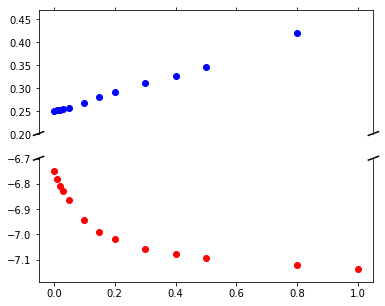

In [55]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True,figsize=(6,5))
ax.plot(energy_contr,deviations,'bo')
ax2.plot(energy_contr,energies,'ro')



# zoom-in / limit the view to different portions of the data
offset=0.05
ax.set_ylim(np.min(deviations)-offset, np.max(deviations[:-1])+offset)  # outliers only
ax2.set_ylim(np.min(energies)-offset, np.max(energies[:-1])+offset)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

In [30]:
deviations

[0.25085030682320136,
 0.2511475458710626,
 0.2524627877815823,
 0.2534512701140409,
 0.043454103315631834,
 0.25601786984720665,
 0.04586615312047361,
 0.05078125574913786,
 0.04783051208124983,
 0.26826634843385067,
 0.28001963259727186,
 0.2904848431902257,
 0.31065673809742317,
 0.32722418109738727,
 0.34586820963048626,
 0.42031858186503446,
 0.6755231332845721]